## 파일명 : batter_MinMaxScaler.ipynb
- MinMaxScaler 사용하여 표준화 후 상관계수 구하기

In [0]:
import pandas as pd

In [0]:
b_no_scale = pd.read_csv('../Data/MLB_data_edit/b_total_no_scale.csv')
b_total_PCT_none = pd.read_csv('../Data/MLB_data_edit/b_total_PCT_none.csv')

In [0]:
b_total_PCT_none

,Unnamed: 0,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,PCT
0,0,0.543605,0.559113,0.432019,0.695037,0.602356,0.458236,0.559271,0.409938,0.491597,0.704624,0.738170,0.289497,0.425862,0.189058,0.462162,0.500842,0.488107,0.515655,0.819629
1,1,0.507180,0.528250,0.491916,0.645615,0.380812,0.258649,0.518218,0.242828,0.270775,0.689141,0.224225,0.583365,0.307530,0.310899,0.383492,0.832209,0.469017,0.644504,0.803714
2,2,0.320394,0.560418,0.614498,0.444179,0.305931,0.218470,0.309606,0.311124,0.336134,0.245943,0.244318,0.536789,0.487125,0.358110,0.491203,0.300412,0.298911,0.295563,0.785146
3,3,0.298869,0.224569,0.147925,0.434342,0.217968,0.301447,0.301526,0.163561,0.034547,0.259080,0.030705,0.289497,0.257389,0.109828,0.224947,0.204407,0.309672,0.261936,0.769231
4,4,0.460021,0.560848,0.518506,0.636246,0.437618,0.302646,0.458966,0.207335,0.314793,0.388672,0.359119,0.274030,0.367699,0.324215,0.648570,0.622444,0.484389,0.565267,0.737401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.585235,0.480932,0.406548,0.378596,0.380812,0.550630,0.563927,0.562260,0.270775,0.592807,0.551083,0.138696,0.367699,0.670430,0.452774,0.467092,0.529499,0.530467,0.328912
296,296,0.376274,0.325467,0.254328,0.364722,0.369888,0.408486,0.372628,0.331104,0.298427,0.322067,0.447518,0.089619,0.176393,0.456862,0.480734,0.374527,0.557414,0.510466,0.196286
297,297,0.824708,0.711770,0.534416,0.796260,0.428649,0.696515,0.808597,0.738477,0.476190,0.668498,1.000000,0.306592,0.600985,0.657815,0.495289,0.489479,0.646524,0.622957,0.164456
298,298,0.399040,0.309401,0.180008,0.370398,0.274300,0.575128,0.409660,0.145963,0.116713,0.339358,0.571836,0.201530,0.116995,0.196049,0.176274,0.137386,0.400344,0.297352,0.114058


In [0]:
del b_total_PCT_none['Unnamed: 0']
del b_total_PCT_none['PCT']

In [0]:
b_total_PCT_none

,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,0.543605,0.559113,0.432019,0.695037,0.602356,0.458236,0.559271,0.409938,0.491597,0.704624,0.738170,0.289497,0.425862,0.189058,0.462162,0.500842,0.488107,0.515655
1,0.507180,0.528250,0.491916,0.645615,0.380812,0.258649,0.518218,0.242828,0.270775,0.689141,0.224225,0.583365,0.307530,0.310899,0.383492,0.832209,0.469017,0.644504
2,0.320394,0.560418,0.614498,0.444179,0.305931,0.218470,0.309606,0.311124,0.336134,0.245943,0.244318,0.536789,0.487125,0.358110,0.491203,0.300412,0.298911,0.295563
3,0.298869,0.224569,0.147925,0.434342,0.217968,0.301447,0.301526,0.163561,0.034547,0.259080,0.030705,0.289497,0.257389,0.109828,0.224947,0.204407,0.309672,0.261936
4,0.460021,0.560848,0.518506,0.636246,0.437618,0.302646,0.458966,0.207335,0.314793,0.388672,0.359119,0.274030,0.367699,0.324215,0.648570,0.622444,0.484389,0.565267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.585235,0.480932,0.406548,0.378596,0.380812,0.550630,0.563927,0.562260,0.270775,0.592807,0.551083,0.138696,0.367699,0.670430,0.452774,0.467092,0.529499,0.530467
296,0.376274,0.325467,0.254328,0.364722,0.369888,0.408486,0.372628,0.331104,0.298427,0.322067,0.447518,0.089619,0.176393,0.456862,0.480734,0.374527,0.557414,0.510466
297,0.824708,0.711770,0.534416,0.796260,0.428649,0.696515,0.808597,0.738477,0.476190,0.668498,1.000000,0.306592,0.600985,0.657815,0.495289,0.489479,0.646524,0.622957
298,0.399040,0.309401,0.180008,0.370398,0.274300,0.575128,0.409660,0.145963,0.116713,0.339358,0.571836,0.201530,0.116995,0.196049,0.176274,0.137386,0.400344,0.297352


In [0]:
b_total_PCT_none.to_csv('../Data/MLB_data_edit/b_total_PCT_none.csv')

In [0]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
from sklearn import preprocessing

In [0]:
# 표준화 작업
col = ['R', 'TH', 'H', '2B', '3B', 'HR','RBI','SB','CS','BB','SO','SH','SF','HBP','AVG','OBP','SLG','OPS']
x=b_total_PCT_none[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [0]:
x_scaled

array([[0.54360539, 0.55911284, 0.43201856, ..., 0.48810657, 0.51565505,
        0.81962865],
       [0.50717953, 0.52825044, 0.49191618, ..., 0.46901688, 0.64450437,
        0.80371353],
       [0.3203935 , 0.56041769, 0.61449764, ..., 0.29891076, 0.29556315,
        0.78514589],
       ...,
       [0.82470759, 0.71177009, 0.53441609, ..., 0.64652412, 0.62295747,
        0.16445623],
       [0.39904025, 0.30940075, 0.18000773, ..., 0.40034441, 0.29735183,
        0.11405836],
       [0.75598117, 0.60816672, 0.46252716, ..., 0.5526839 , 0.55188277,
        0.00530504]])

In [0]:
bat_scaled = pd.DataFrame(x_scaled, columns=col, index=b_no_scale.index)

In [0]:
bat_scaled

,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,0.543605,0.559113,0.432019,0.695037,0.602356,0.458236,0.559271,0.409938,0.491597,0.704624,0.738170,0.289497,0.425862,0.189058,0.462162,0.500842,0.488107,0.515655
1,0.507180,0.528250,0.491916,0.645615,0.380812,0.258649,0.518218,0.242828,0.270775,0.689141,0.224225,0.583365,0.307530,0.310899,0.383492,0.832209,0.469017,0.644504
2,0.320394,0.560418,0.614498,0.444179,0.305931,0.218470,0.309606,0.311124,0.336134,0.245943,0.244318,0.536789,0.487125,0.358110,0.491203,0.300412,0.298911,0.295563
3,0.298869,0.224569,0.147925,0.434342,0.217968,0.301447,0.301526,0.163561,0.034547,0.259080,0.030705,0.289497,0.257389,0.109828,0.224947,0.204407,0.309672,0.261936
4,0.460021,0.560848,0.518506,0.636246,0.437618,0.302646,0.458966,0.207335,0.314793,0.388672,0.359119,0.274030,0.367699,0.324215,0.648570,0.622444,0.484389,0.565267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.585235,0.480932,0.406548,0.378596,0.380812,0.550630,0.563927,0.562260,0.270775,0.592807,0.551083,0.138696,0.367699,0.670430,0.452774,0.467092,0.529499,0.530467
296,0.376274,0.325467,0.254328,0.364722,0.369888,0.408486,0.372628,0.331104,0.298427,0.322067,0.447518,0.089619,0.176393,0.456862,0.480734,0.374527,0.557414,0.510466
297,0.824708,0.711770,0.534416,0.796260,0.428649,0.696515,0.808597,0.738477,0.476190,0.668498,1.000000,0.306592,0.600985,0.657815,0.495289,0.489479,0.646524,0.622957
298,0.399040,0.309401,0.180008,0.370398,0.274300,0.575128,0.409660,0.145963,0.116713,0.339358,0.571836,0.201530,0.116995,0.196049,0.176274,0.137386,0.400344,0.297352


In [0]:
bat_scaled.to_csv('../Data/MLB_data_edit/b_total_MMS_PCT_none.csv')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
col = ['R', 'TH', 'H', '2B', '3B', 'HR','RBI','SB','CS','BB','SO','SH','SF','HBP','AVG','OBP','SLG','OPS']
R=np.corrcoef(bat_scaled['R'],b_no_scale['PCT'])
TH=np.corrcoef(bat_scaled['TH'],b_no_scale['PCT'])
H=np.corrcoef(bat_scaled['H'],b_no_scale['PCT'])
B2=np.corrcoef(bat_scaled['2B'],b_no_scale['PCT'])
B3=np.corrcoef(bat_scaled['3B'],b_no_scale['PCT'])
HR=np.corrcoef(bat_scaled['HR'],b_no_scale['PCT'])
RBI=np.corrcoef(bat_scaled['RBI'],b_no_scale['PCT'])
SB=np.corrcoef(bat_scaled['SB'],b_no_scale['PCT'])
CS=np.corrcoef(bat_scaled['CS'],b_no_scale['PCT'])
BB=np.corrcoef(bat_scaled['BB'],b_no_scale['PCT'])
SO=np.corrcoef(bat_scaled['SO'],b_no_scale['PCT'])
SH=np.corrcoef(bat_scaled['SH'],b_no_scale['PCT'])
SF=np.corrcoef(bat_scaled['SF'],b_no_scale['PCT'])
HBP=np.corrcoef(bat_scaled['HBP'],b_no_scale['PCT'])
AVG=np.corrcoef(bat_scaled['AVG'],b_no_scale['PCT'])
OBP=np.corrcoef(bat_scaled['OBP'],b_no_scale['PCT'])
SLG=np.corrcoef(bat_scaled['SLG'],b_no_scale['PCT'])
OPS=np.corrcoef(bat_scaled['OPS'],b_no_scale['PCT'])

In [0]:
hitmap = pd.DataFrame({
    'R':R[1][0],
    'TH':TH[1][0],
    'H':H[1][0],
    '2B':B2[1][0],
    '3B':B3[1][0],
    'HR':HR[1][0],
    'RBI':RBI[1][0],
    'SB':SB[1][0],
    'CS':CS[1][0],
    'BB':BB[1][0],
    'SO':SO[1][0],
    'SH':SH[1][0],
    'SF':SF[1][0],
    'HBP':HBP[1][0],
    'AVG':AVG[1][0],
    'OBP':OBP[1][0],
    'SLG':SLG[1][0],
    'OPS':OPS[1][0],
    
},index=['corrcoef'])

In [0]:
hitmap

,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
corrcoef,0.057705,0.113008,0.112155,0.122016,0.093762,0.012282,0.060167,-0.068374,-0.046446,-0.016945,0.032993,-0.052372,-0.046472,-0.042926,0.123927,0.068073,0.057308,0.066068


In [0]:
hitmap=np.abs(hitmap)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

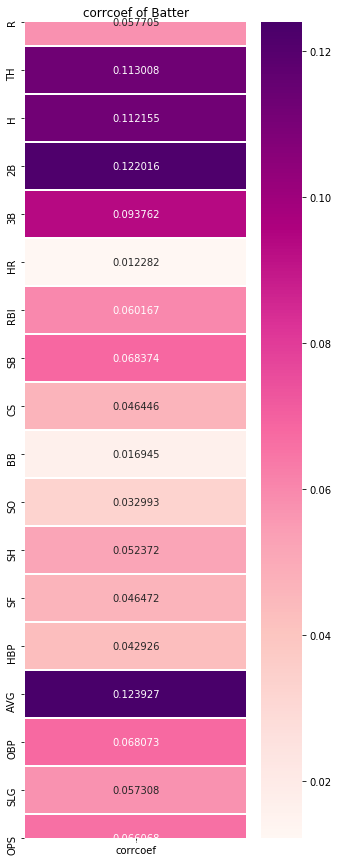

In [0]:
plt.figure(figsize=(5,15))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Batter')
plt.show()